### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv


### Reading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv', index_col='Unnamed: 0')
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [3]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [4]:
df.tail()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0
836,Puducherry,Total District(s),2014,10,7,1,32,8,4,0


In [5]:
df.sample(5)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
7663,JAMMU & KASHMIR,RAILWAYS KASHMIR,2011,0,0,0,0,1,0,0
4799,MEGHALAYA,TOTAL,2007,82,22,2,45,1,19,0
52,Assam,Guwahati City,2014,100,424,11,143,0,486,0
7358,WEST BENGAL,24 PARGANAS SOUTH,2010,258,215,48,113,0,2879,0
6249,MADHYA PRADESH,VIDISHA,2009,80,13,19,216,30,87,0


In [6]:
df.shape

(10677, 10)

In [7]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10677 entries, 0 to 836
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10677 non-null  object
 1   DISTRICT                                             10677 non-null  object
 2   Year                                                 10677 non-null  int64 
 3   Rape                                                 10677 non-null  int64 
 4   Kidnapping and Abduction                             10677 non-null  int64 
 5   Dowry Deaths                                         10677 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 7   Insult to modesty of Women                           10677 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10677 non-null  int64 
 9

In [9]:
df.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


### Data Cleaning

In [10]:
df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

None of the fields have any null values

In [11]:
df['DISTRICT'].nunique()

1605

In [12]:
df['DISTRICT'].value_counts()

TOTAL         408
G.R.P.         49
SOUTH          41
NORTH          41
WEST           39
             ... 
Shopian         1
Sopore          1
Srinagar        1
Udhampur        1
Puducherry      1
Name: DISTRICT, Length: 1605, dtype: int64

There is total 797 districs in india as per August 2023 and here this field shows 1605. This means there is too much falsy data here and it is also tough to clean this field.

In [13]:
df['STATE/UT'].nunique()

72

In [14]:
df['STATE/UT'].value_counts()

UTTAR PRADESH     878
MADHYA PRADESH    628
MAHARASHTRA       552
BIHAR             540
TAMIL NADU        469
                 ... 
A&N Islands         4
Chandigarh          4
D&N Haveli          4
Lakshadweep         4
A & N Islands       4
Name: STATE/UT, Length: 72, dtype: int64

In [15]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

There is total 28 states and 8 Union territories (Total->36) in india as per August 2023 and here this field shows 72.
But let's clean this field as this field is more useful in our analysis

In [16]:
def remove_uppercase(row):
    state = row['STATE/UT'].strip()
    state = state.upper()
    return state
state_series = df.apply(remove_uppercase, axis=1)
df['STATE/UT']=state_series

df['STATE/UT'].replace("A&N ISLANDS","A & N ISLANDS", inplace = True)
df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)

In [17]:
df['STATE/UT'].nunique()

36

Now this field has correct data

In [18]:
df.rename( columns = {'Kidnapping and Abduction':'Kidnap_Abduct','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Assault_on_women',
                             'Insult to modesty of Women':'Insulting_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnap_Abduct', 'Dowry_Deaths',
       'Assault_on_women', 'Insulting_womens_modesty', 'Domestic_Cruelty',
       'Importation_of_Girls'],
      dtype='object')

Now, Data cleaning is done. So let's start analysis😊

### Analysis

### Different crimes against women

In [19]:
crime_name=list(df.columns)[3:]
crime_name

['Rape',
 'Kidnap_Abduct',
 'Dowry_Deaths',
 'Assault_on_women',
 'Insulting_womens_modesty',
 'Domestic_Cruelty',
 'Importation_of_Girls']

In [20]:
victims=df[crime_name].sum()
victims

Rape                         619158
Kidnap_Abduct                746198
Dowry_Deaths                 215480
Assault_on_women            1212258
Insulting_womens_modesty     292756
Domestic_Cruelty            2233888
Importation_of_Girls           1872
dtype: int64

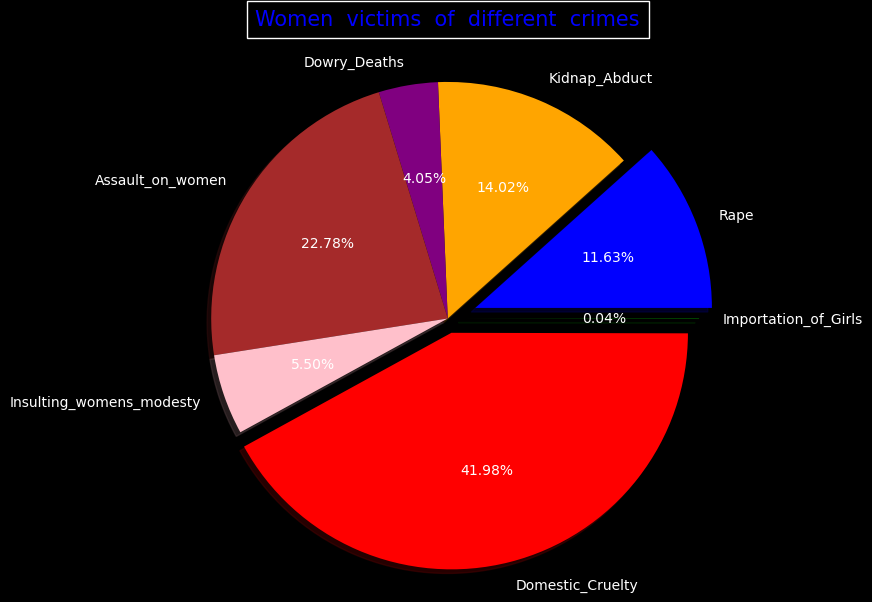

In [21]:
plt.pie(victims,radius=1.6,labels=crime_name,autopct='%0.2f%%',shadow=True,explode=[0.2,0,0,0,0,0.1,0.1],colors=['blue','orange','purple','brown','pink','red','green'])
plt.title("Women  victims  of  different  crimes",bbox={'facecolor':'black','pad':5},pad=78,color='b',size=15)
plt.show()

In [22]:
total_victims=victims.sum()
total_victims

5321610

More than 5 million number of females, over the years 2001-2014, have been a victim of assault, violance, rape or even death, in India alone.

### Crimes across the years

In [23]:
df1=df.groupby("Year")[crime_name].sum()
sum_df=df1.reset_index()
sum_df

,Year,Rape,Kidnap_Abduct,Dowry_Deaths,Assault_on_women,Insulting_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,2001,32150,29290,13702,68248,19492,98340,228
1,2002,32746,29012,13644,67886,20310,98474,152
2,2003,31694,26592,12416,65878,24650,101406,92
3,2004,36466,31156,14052,69134,20002,116242,178
4,2005,36718,31500,13574,68350,19968,116638,298
5,2006,38696,34828,15236,73234,19932,126256,134
6,2007,41474,40832,16186,77468,21900,151860,122
7,2008,42934,45878,16344,80826,24428,162688,134
8,2009,42794,51482,16766,77422,22018,179092,96
9,2010,44344,59590,16782,81226,19922,188082,72


In [24]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-5)

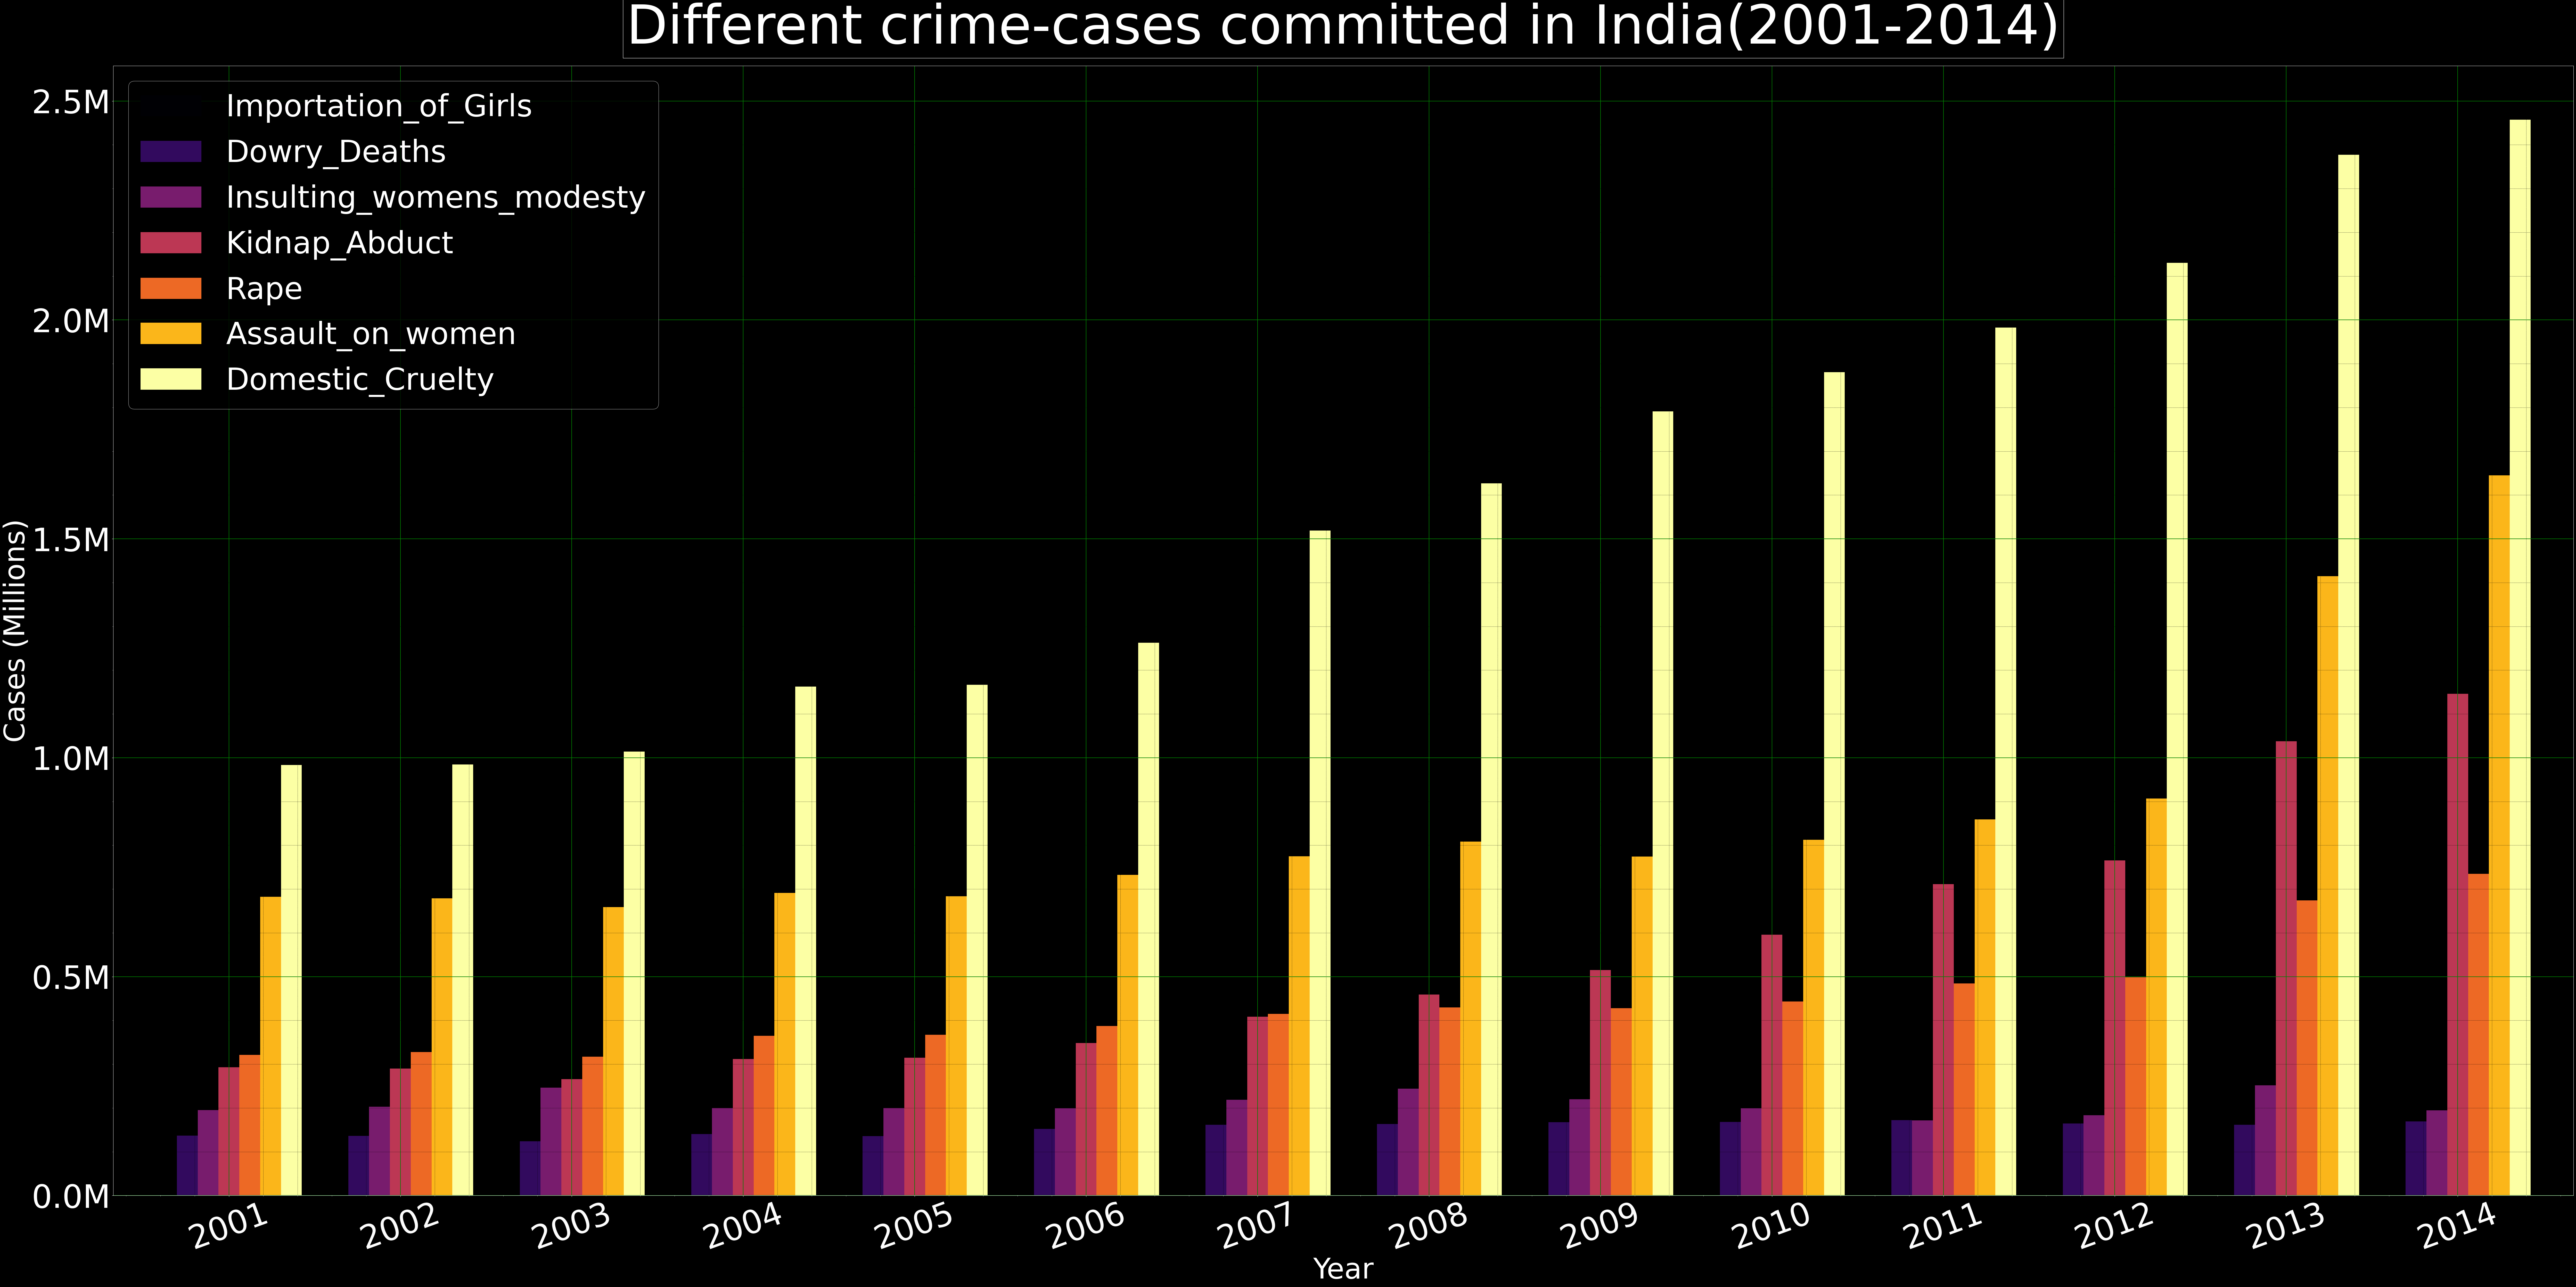

In [25]:
order = ['Importation_of_Girls', 'Dowry_Deaths', 'Insulting_womens_modesty', 'Kidnap_Abduct', 'Rape', 'Assault_on_women', 'Domestic_Cruelty']

fig, ax = plt.subplots(1, 1, figsize=(100, 50))
sum_df.plot(x='Year', y=order, ax=ax, rot=20, kind='bar', width=0.85, colormap='inferno')

plt.title("Different crime-cases committed in India(2001-2014)", fontsize=150, bbox={'facecolor': 'black', 'pad': 9}, pad=62)
plt.xlabel("Year", fontsize=80)
plt.ylabel("Cases (Millions)", fontsize=80) 
plt.tick_params(labelsize=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.minorticks_on()
plt.grid(which='major', color='g', linestyle='-', linewidth='1.5')
plt.grid(which='minor', color='k', linestyle=':', linewidth='0.9')

plt.legend(fontsize=85)
plt.tight_layout()
plt.show()

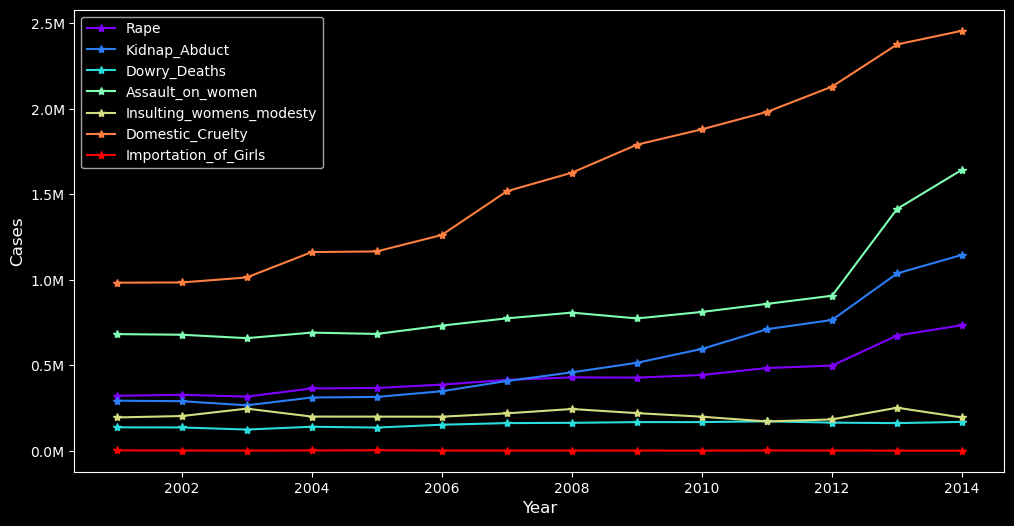

In [26]:
ax=df1.plot(figsize=(12,6),marker='*', colormap='rainbow')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Cases',fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.show()

We come to know that domestic cruelty is the biggest threat to women's safety in India,and it is increasing rapidly. Secondly, importation of girls is negligible as compared to other crimes.

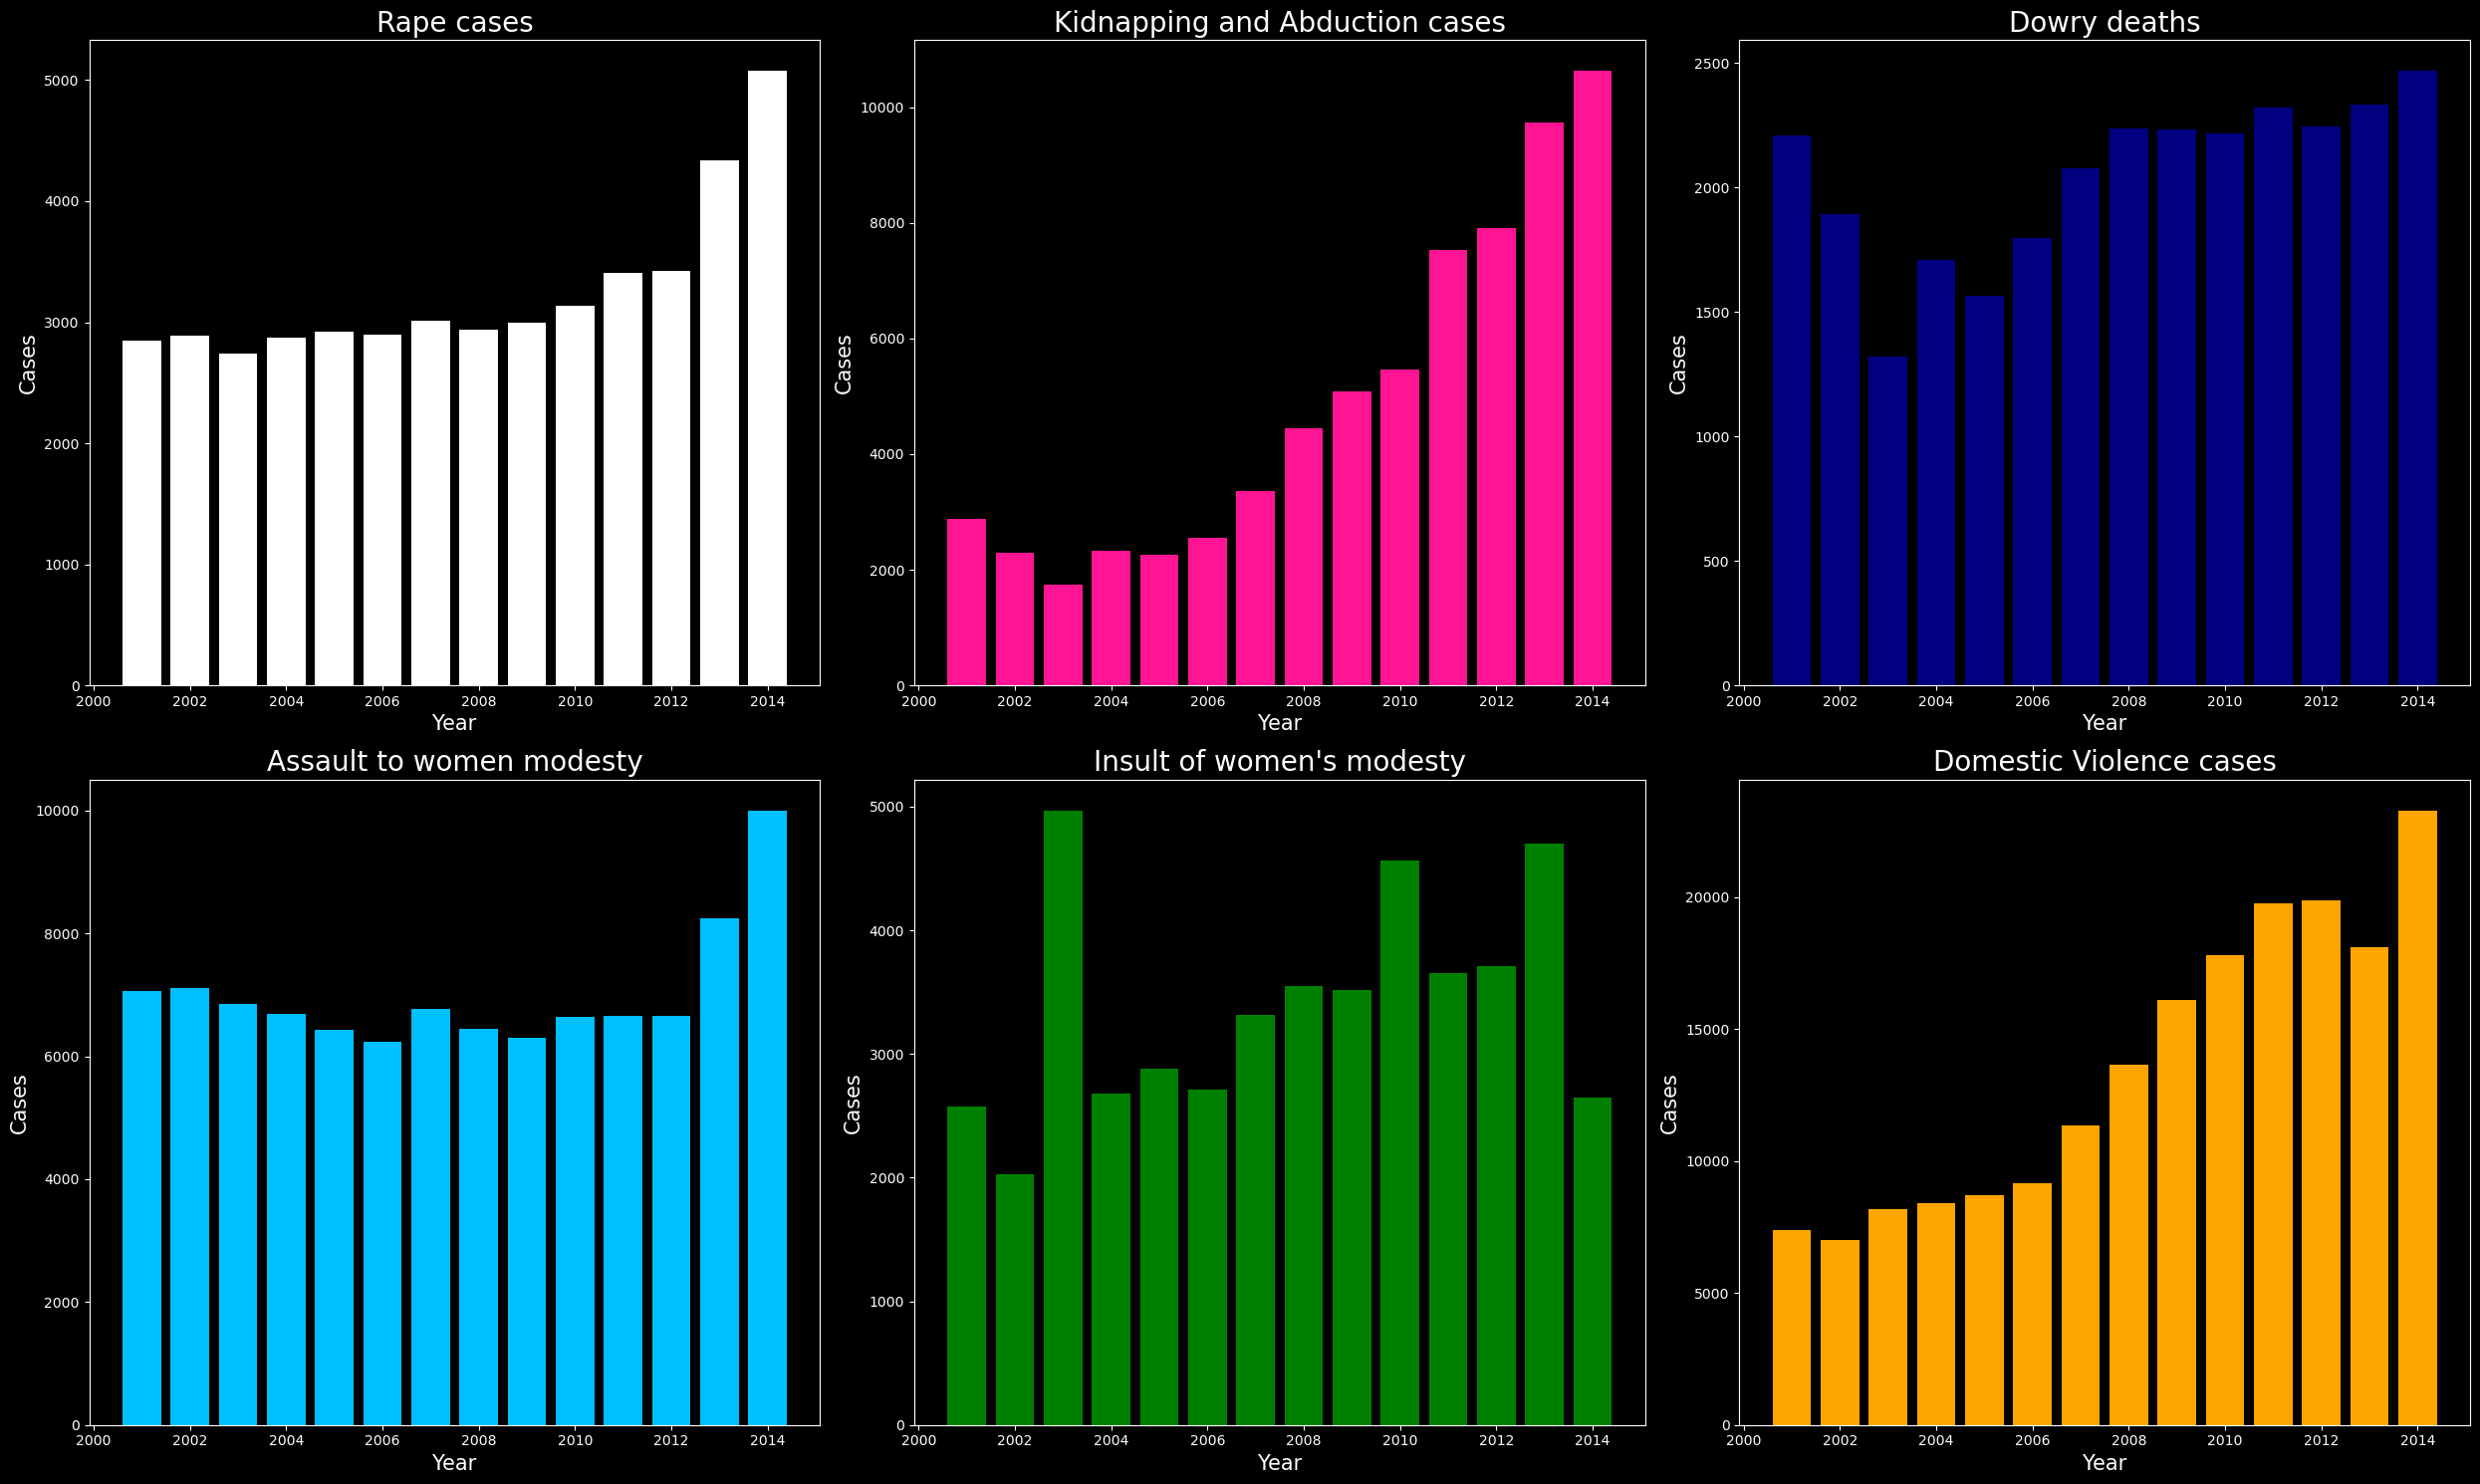

In [27]:
crimes = ['Rape', 'Kidnap_Abduct', 'Dowry_Deaths', 'Assault_on_women', 'Insulting_womens_modesty', 'Domestic_Cruelty']
colors = ['white', 'deeppink', 'navy', 'deepskyblue', 'green', 'orange']
titles = ['Rape cases', 'Kidnapping and Abduction cases', 'Dowry deaths', 'Assault to women modesty', 'Insult of women\'s modesty', 'Domestic Violence cases']

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.flatten()

for i, crime in enumerate(crimes):
    ax = axes[i]
    ax.set_xlabel('Year', fontsize=15)
    ax.set_ylabel('Cases', fontsize=15)
    ax.set_title(titles[i], fontsize=20)
    ax.bar(df.Year, df[crime], color=colors[i])

plt.tight_layout()
plt.show()

* The cases have increased over the years
* 2014 was the year, when violance against women was reported the maximum

### Importation of Girls

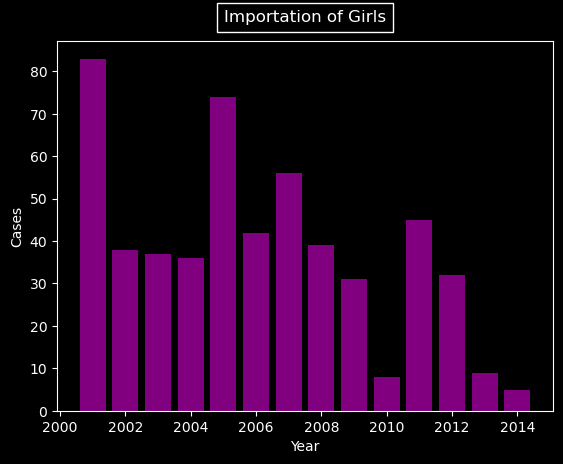

In [28]:
plt.bar(df.Year, df.Importation_of_Girls, color = 'purple')
plt.title("Importation of Girls",bbox={'facecolor':'black','pad':5},pad=14)
plt.xlabel('Year') 
plt.ylabel('Cases')
plt.show()

This graph depicts that Importation of girls is much less in 2014 as compared to 2001.

### Frequency of cases reported

In [29]:
count_df = df.groupby('Year')[['STATE/UT']].count()
count_df.head()

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733


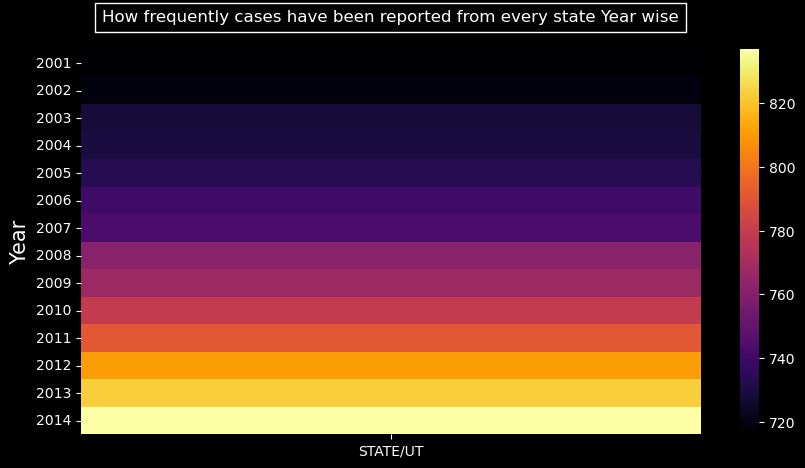

In [30]:
plt.figure(figsize=(10,5))
plt.ylabel('Year',fontsize=15)
plt.title("How frequently cases have been reported from every state Year wise",bbox={'facecolor':'black','pad':5},pad=20)
sns.heatmap(count_df,cmap='inferno');

This heatmap shows how states' names started appearing more frequently on the dataset, for reporting crimes and sadly the crime only increased with the passing year.

It gives us the conclusion that overall(cases under each category), from every state, has increased with time, not decreased.

### Top 5 states with most crimes in India

In [31]:
state_df=df.groupby('STATE/UT')[crime_name].sum().sum(axis=1).sort_values()
df2=state_df.to_frame().rename(columns={0:'crimes_in_state'})
df2.reset_index(inplace=True)
df2.tail()

,STATE/UT,crimes_in_state
31,MADHYA PRADESH,467086
32,RAJASTHAN,470186
33,WEST BENGAL,537976
34,ANDHRA PRADESH,575354
35,UTTAR PRADESH,582398


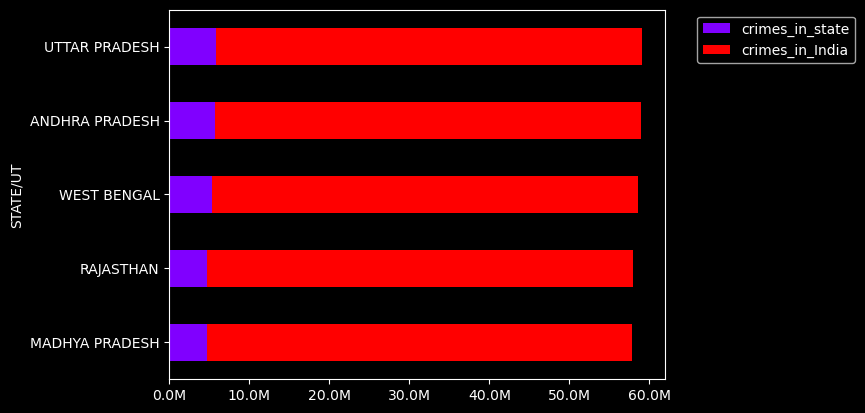

In [32]:
li=[df2.crimes_in_state.sum()]*5
df3=df2.tail()
df3.insert(2,'crimes_in_India',li)
ax=df3.plot(x='STATE/UT',kind='barh',stacked=True,colormap='rainbow')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.show()

UTTAR PRADESH has the highest crime reported in this period of time

### Cases of domestic violence and women assault

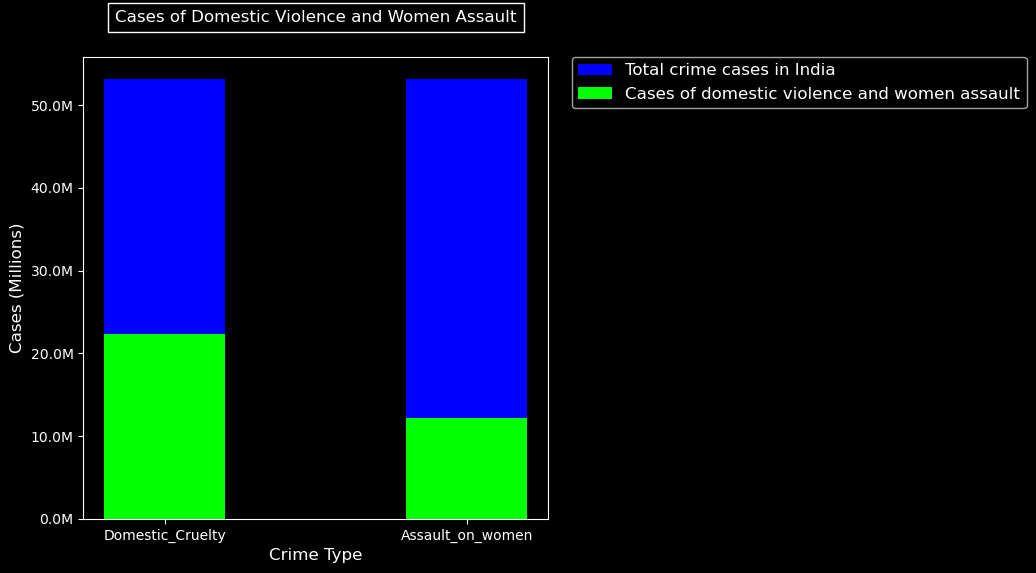

In [33]:
dc = df['Domestic_Cruelty'].sum()
wa = df['Assault_on_women'].sum()
tc = df[crime_name].sum().sum()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Cases of Domestic Violence and Women Assault", bbox={'facecolor': 'black', 'pad': 5}, pad=25)
bar_width = 0.4

ax.bar(['Domestic_Cruelty', 'Assault_on_women'], [tc, tc], color='b', width=bar_width, label='Total crime cases in India')
ax.bar(['Domestic_Cruelty', 'Assault_on_women'], [dc, wa], color='lime', width=bar_width, label='Cases of domestic violence and women assault')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

ax.legend(fontsize='larger', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Cases (Millions)', fontsize=12)
plt.show()

### Insights
* More than 5 million females has been a victim of some or other type of Violance, based on their gender,starting from rape to importing them for buisness.
* We summarised the TOTAL number of cases happening, in 2001-2014, by each state and also found out the top 5 states where maximum number of TOTAL cases has been reported from 2001-2014,state wise.
* We concluded from the series of bar graphs that 2014 was the year, when crimes were reported the highest under each category.
* We also merged the data in two different cases, first one being "Maximum number of rape cases" and "Maximum number of Importation cases", where we found out it is Madhya Pradesh and in second one being "Maximum number of rape cases" and "Maximum number of Deaths due to Dowry cases", which we concluded to be Uttar Pradesh.
* We concluded that crimes against women has been on increase.